<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#We are going to perform the neccessary ML Steps, including data preprocessing, building a model, fitting it, making predictions with it, and evaluating it. Lastly, saving it


In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [3]:
torch.__version__

'2.1.0+cu121'

#Data Preparation and loading
a)we start with a regression model with known data



In [4]:
#1Step 1: Create known variables
bias = 0.3
weight = 0.7
#create
start = 0
end = 1
step = 0.02
#Recap
#The Linear regression formula is y = a + bX. In this case, bias  = a, and weight = b
X = torch.arange(start, end, step).unsqueeze(dim = 1)
#y = a + bX
y = bias + weight * X


view = (X[:10], y[:10], len(X), len(y))
print(view)

(tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]]), tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]]), 50, 50)


#Splitting data into traing and test sets

#Splitting data into training set and testset

In [5]:
#1create a train/test split

#we take 80% of x as :
train_split = int(0.8*len(X)) #This translates to 40 samples of X

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
print(len(X_train), len(y_train), len(X_test), len(y_test))

40 40 10 10


#Wait a minute... How might we best visualize out data? Visualize, visualize,, visualize


In [6]:
print(X_train, y_train)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800]]) tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260],
        [0.4400],
        [0.4540],
        [0.4680],
        [0.4820],
        [0.4960],
        [

#Let us Visualize, visualize, visualize (""Motto"")

In [7]:
import matplotlib.pyplot as plt


def plot_predictions(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions = None):

#Now we plot training data, test data and then compare predictions
  plt.figure(figsize  = (10, 7))
  #plotting Training data in blue
  plt.scatter(train_data, train_labels, c = "b", s = 4, label = "Training Data")
  #Plotting testing data in red
  plt.scatter(test_data, test_labels, c = "r", s = 4, label = "Testing Data")
  #Checking if there are prediction
  if predictions is not None:
    #we plot the predictions if they exist
    plt.scatter(test_data, predictions, c = "r", s = 4, label = "Predictions")
    #Show the legend
    plt.legend(prop = {"size": 14});




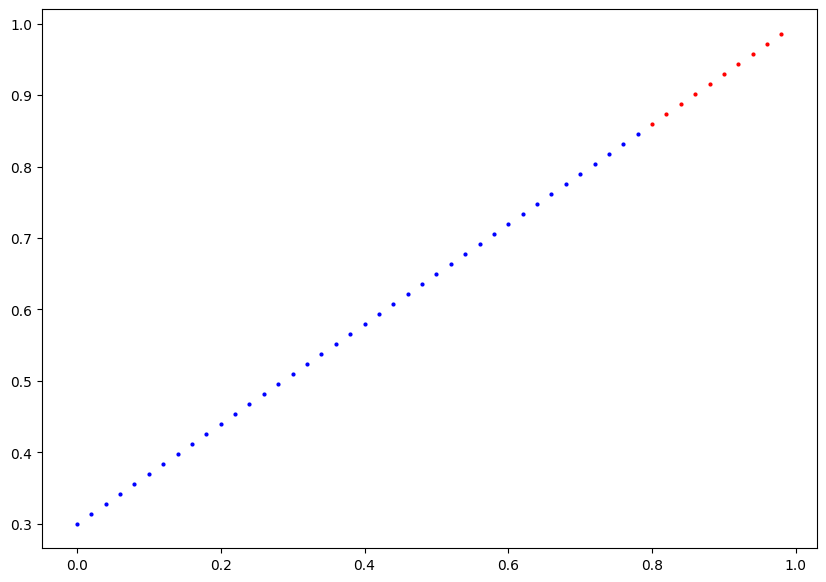

In [8]:
plot_predictions();

#We now Build a Model

In [9]:
#Building our very first model
#We are creatinga linear regression model class as the first step
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                requires_grad=True,
                                dtype = torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype = torch.float))
    #We use the foward model to define the computation of the model
  def forward(self, X:torch.Tensor) -> torch.Tensor:
    return self.weights * X + self.bias #This is our linear regression formula
#The two algrithim being emplpyed are the gradient Descent and BackPropagation

In [10]:
#Let us check the contents of our PyTorch Model. We use .parameters()
#1: We create a random seed
torch.manual_seed(42)
#2: We create an instance of the model, which is subclass of the nn.Module
model_0 = LinearRegressionModel()
print(model_0)
print(list(model_0.parameters()))
print(model_0.state_dict())


LinearRegressionModel()
[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])


#We now Make predictions using the model
  #We use torch.inference_mode()
    #We will first use the X_test and y_test, and then when passing the data through the model, we use the forward() mode
    

In [11]:
#1Make predictions with the model
with torch.inference_mode():
  y_preds = model_0(X_test)


print(y_preds)


tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


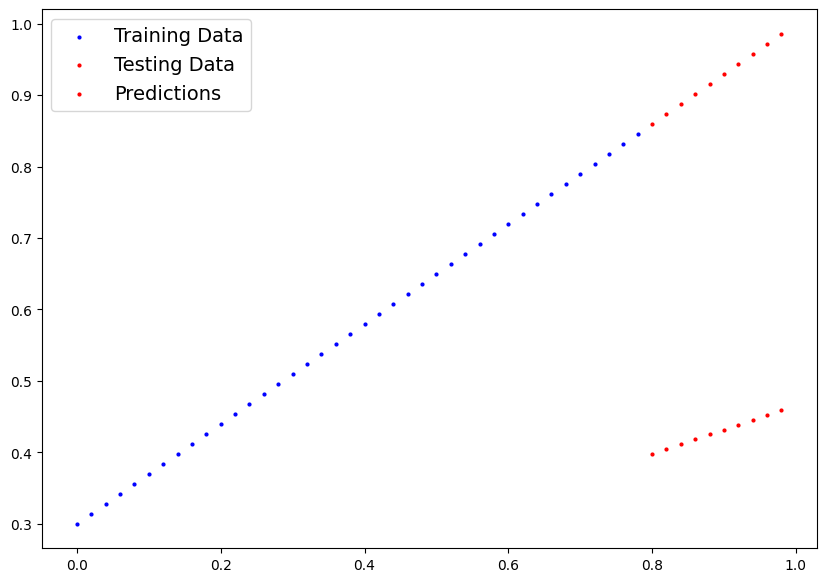

In [12]:
plot_predictions(predictions = y_preds)

#That was awesome